## Aluno: Fernando Gomes Papi

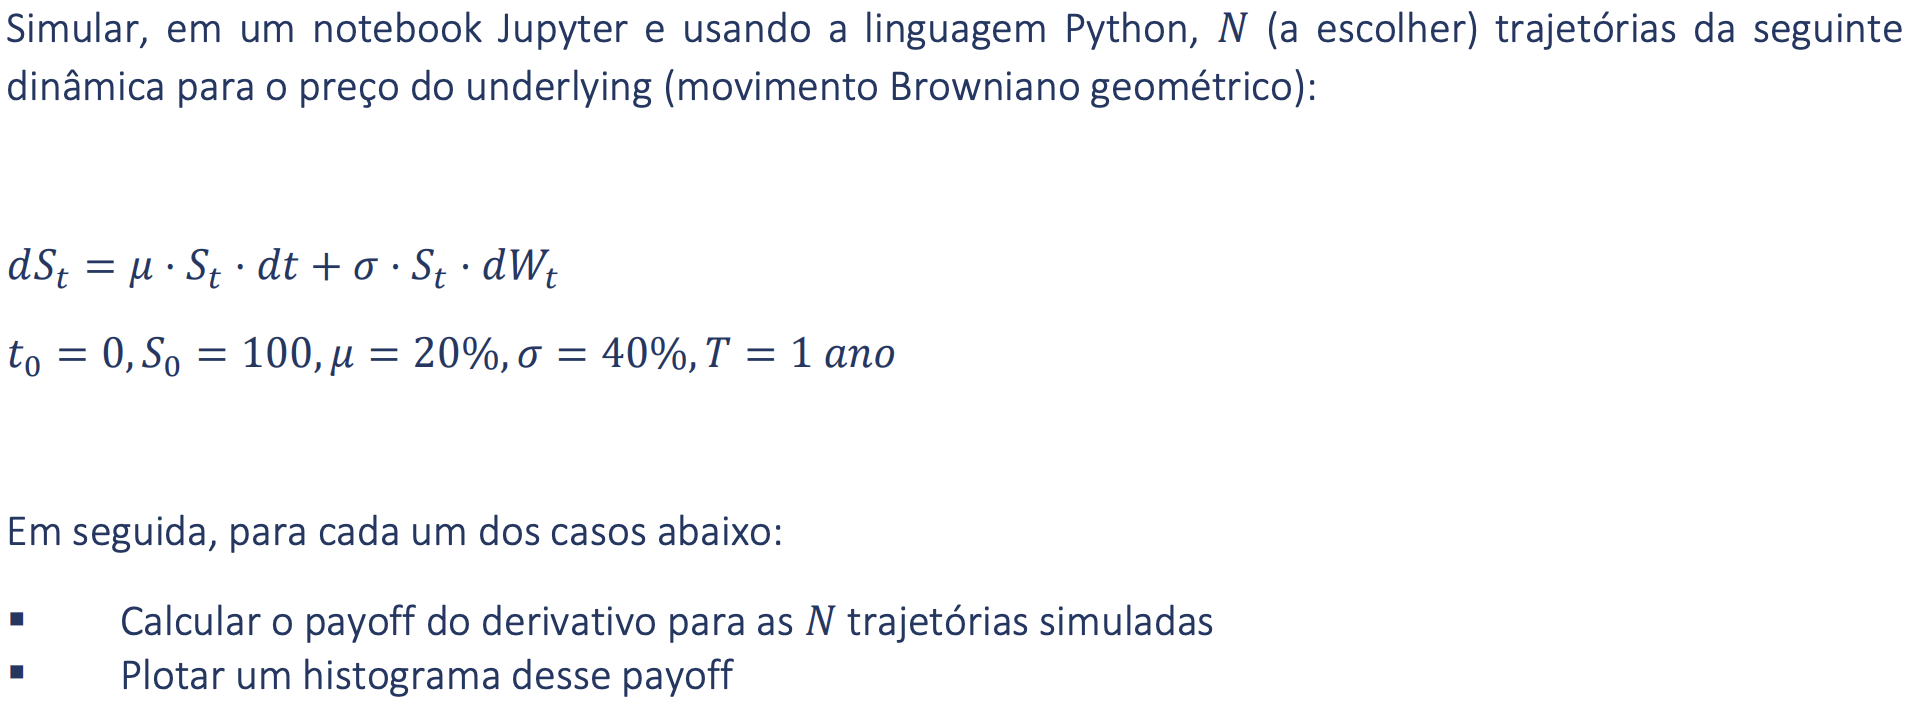

In [67]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
# Parameters
mu = 0.2      # Expected drift or mean return
sigma = 0.4   # Volatility
S0 = 100      # Initial asset price
T = 1 # Total time in years
dt = 1/365    # Time step (daily)

In [69]:
def plot_histogram(payoffs, title):
    # Set the style for the plot (optional)
    plt.figure(figsize=(8,8))
    sns.set(style="whitegrid")
    
    # Create a beautiful histogram
    sns.histplot(payoffs, kde=True, color='blue', bins=50)
    
    # Add labels and a title (customize as needed)
    plt.xlabel("Payoff")
    plt.ylabel("Payoff Count")
    plt.title(title)
    
    # Show the plot
    plt.show()

In [70]:
## extra: Aleatory python package
from aleatory.processes import GBM

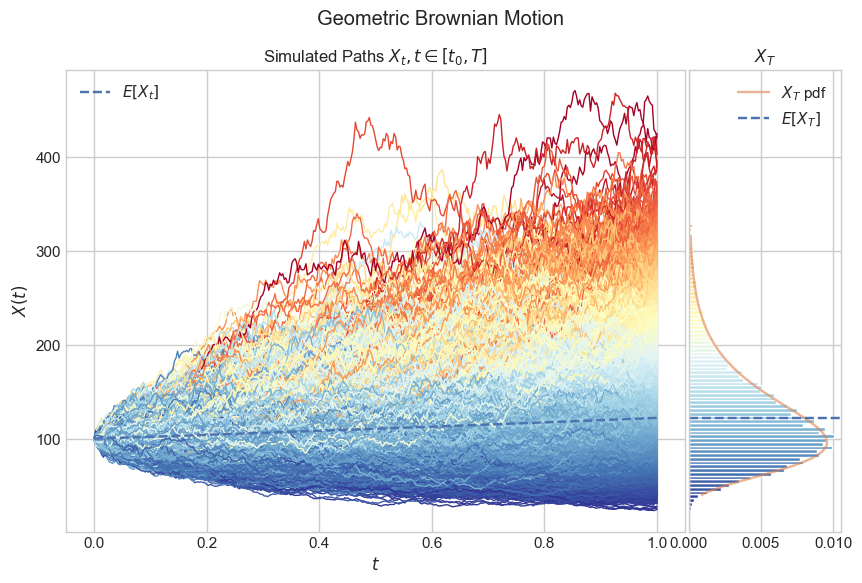

In [71]:
gbm = GBM(drift=mu, volatility=sigma, initial=S0, T=T)
fig_kw = {'figsize':(10,6)}
fig = gbm.draw(envelope=True, n = 365, N=10000 ,**fig_kw)

In [72]:
# all paths as a dataframe where rows are t and columns are each price path
gbm_paths_df = pd.DataFrame(np.array(gbm.paths).T)
gbm_paths_df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,99.933233,98.921099,97.597783,100.598177,96.799727,99.458647,98.575182,100.328244,100.711569,99.247695,...,98.190239,96.440255,100.251902,100.047821,101.807367,99.143725,97.284872,103.292269,97.676096,100.159810
2,102.045428,94.784433,99.411065,102.924137,97.644483,97.055605,99.161394,97.521089,101.258484,102.267663,...,100.275037,98.826655,99.923987,99.748543,104.459652,97.914742,96.475677,103.438317,98.412870,100.406091
3,103.818871,94.010940,100.084879,105.306413,97.306831,100.782626,100.169172,97.668165,103.643246,104.625302,...,100.678686,96.887629,100.912126,100.436320,101.753191,97.091847,96.722671,103.552646,97.736538,102.266705
4,101.772158,90.799823,104.353968,106.124307,102.286991,101.204399,97.796022,98.345725,103.366765,103.247657,...,100.303676,97.776223,102.998897,99.160204,99.646388,95.346168,95.570183,101.698030,98.749563,100.901108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,199.879840,135.297228,214.170300,104.935622,102.036571,85.688611,67.281509,121.347427,134.589614,129.528852,...,112.051836,142.159213,79.698384,101.940525,171.138031,108.050138,192.826311,53.009979,100.878167,94.028534
361,197.232280,137.064403,222.243950,101.896066,105.960349,85.549968,67.787346,125.518965,130.053404,129.509694,...,110.565884,138.507242,80.629799,100.590545,168.581483,106.825722,189.480490,52.854486,102.746174,98.485342
362,192.391714,137.887722,229.529099,103.477567,105.818101,86.925655,67.163768,124.269495,133.687227,130.232664,...,107.536145,138.011507,80.402129,97.524649,166.455624,108.242819,186.571554,54.025798,103.167346,97.935548
363,193.715496,138.996127,227.638982,102.673487,106.383440,85.715722,65.439680,120.323903,132.761065,135.135615,...,107.469899,137.137091,78.306023,98.802051,166.706024,104.294191,184.111196,54.734822,100.035837,99.798269


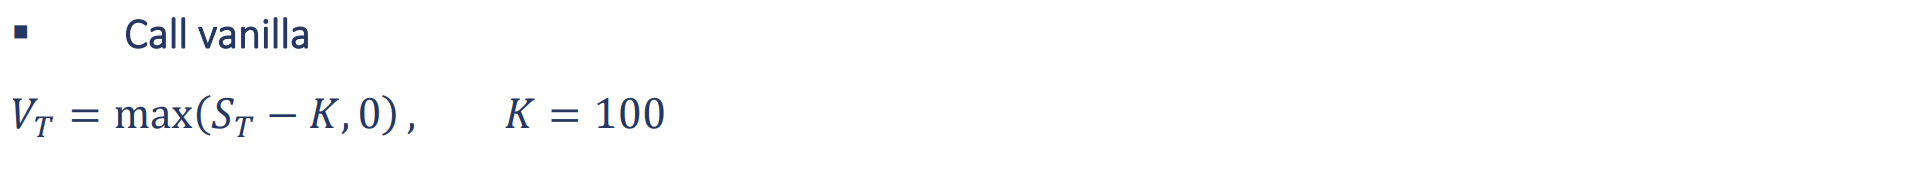

In [73]:
K = 100 # strike price

def payoff_call_vanilla(final_price, k):
    return max(final_price - k, 0)

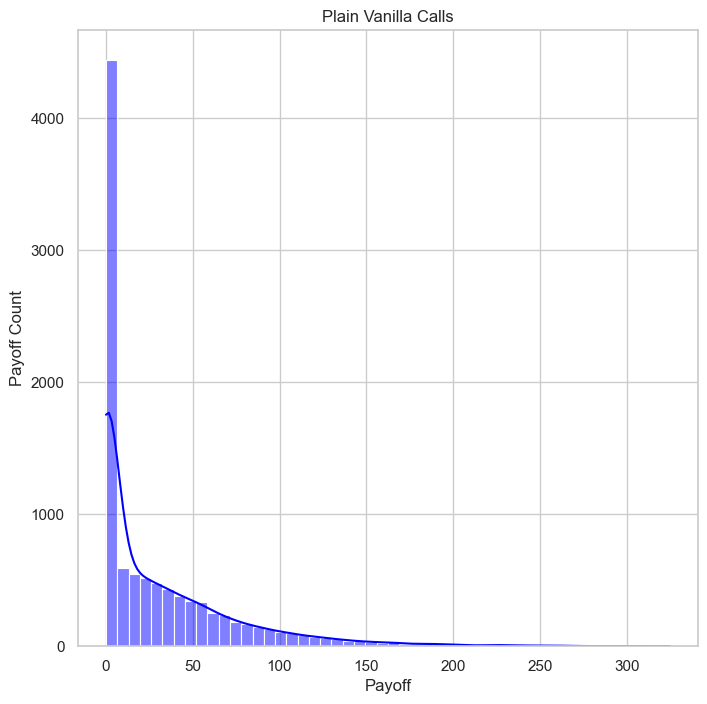

In [74]:
# final value of each price path
final_values = gbm_paths_df.iloc[-1]

# calculate all payoffs for vanilla call options
payoffs_vanilla = final_values.apply(lambda x: payoff_call_vanilla(x, K))
# plot histogram
plot_histogram(payoffs_vanilla, 'Plain Vanilla Calls')

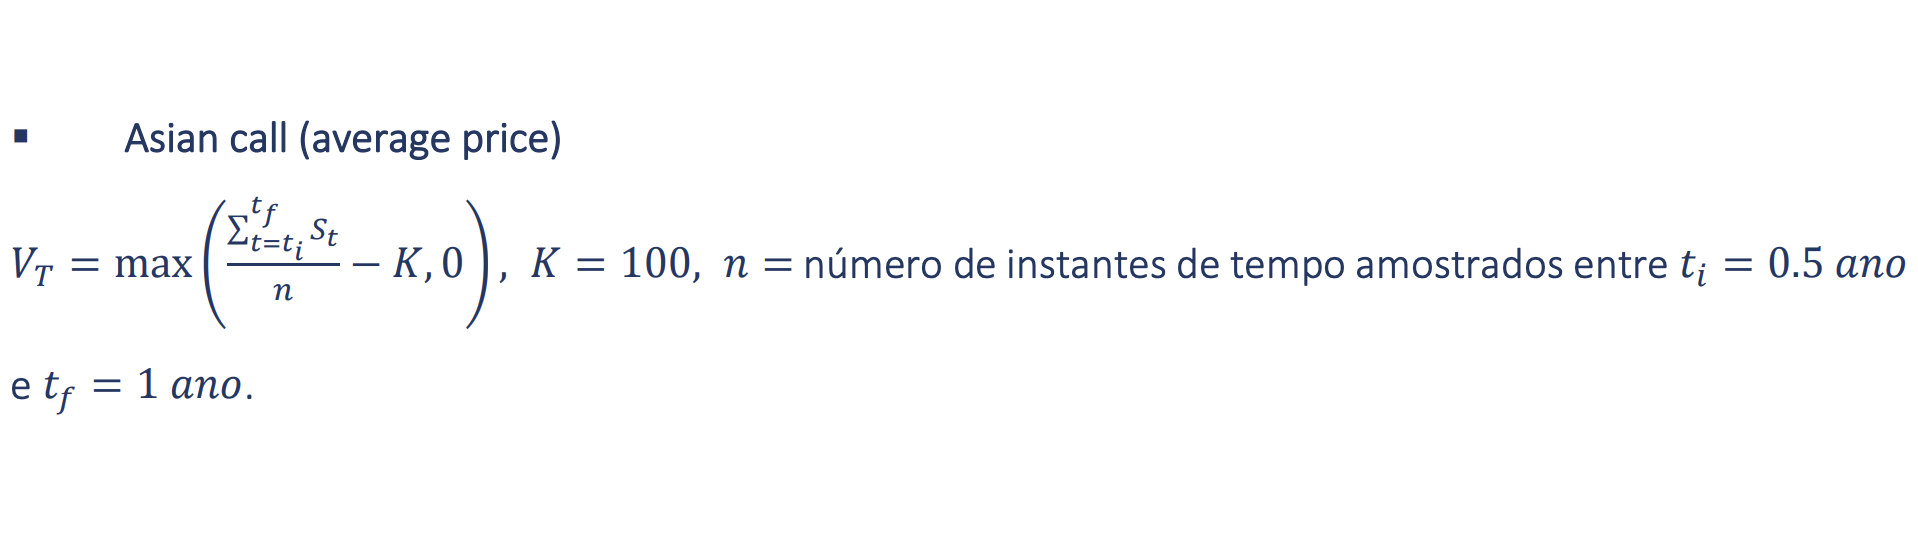

In [75]:
# strike price
K = 100

def payoff_asian_call(st, k):
    # average of the price path
    avg_price = np.mean(st)
    # calculate payoff
    payoff = max(avg_price - k, 0)
    return payoff

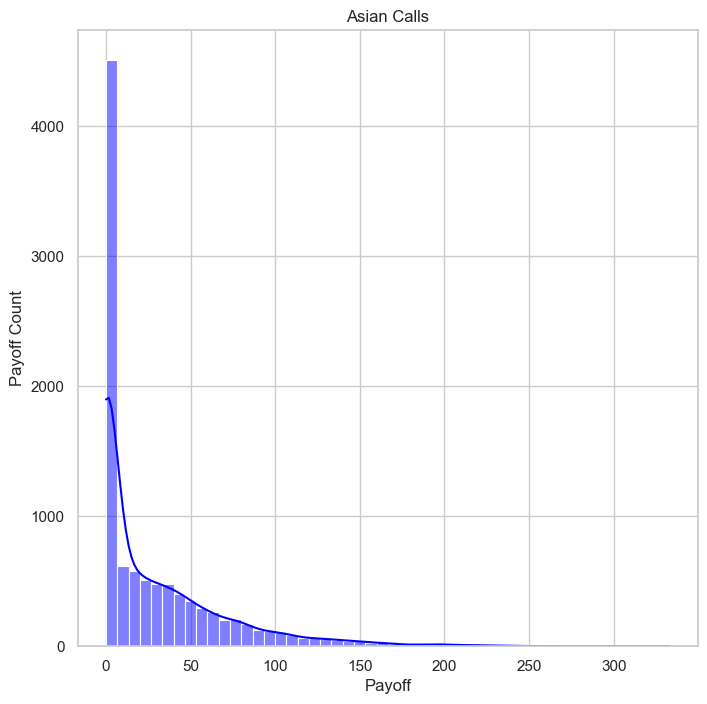

In [76]:
# get n points of the price path, where n = 0.5*T
n = int(0.1 * len(gbm_paths_df)) # 364/2 points

# slice to get last n values
price_values = gbm_paths_df.iloc[-n:]

# calculate the payoff of asian call options
asian_payoffs = price_values.apply(lambda x: payoff_asian_call(x, K))

plot_histogram(asian_payoffs, 'Asian Calls')

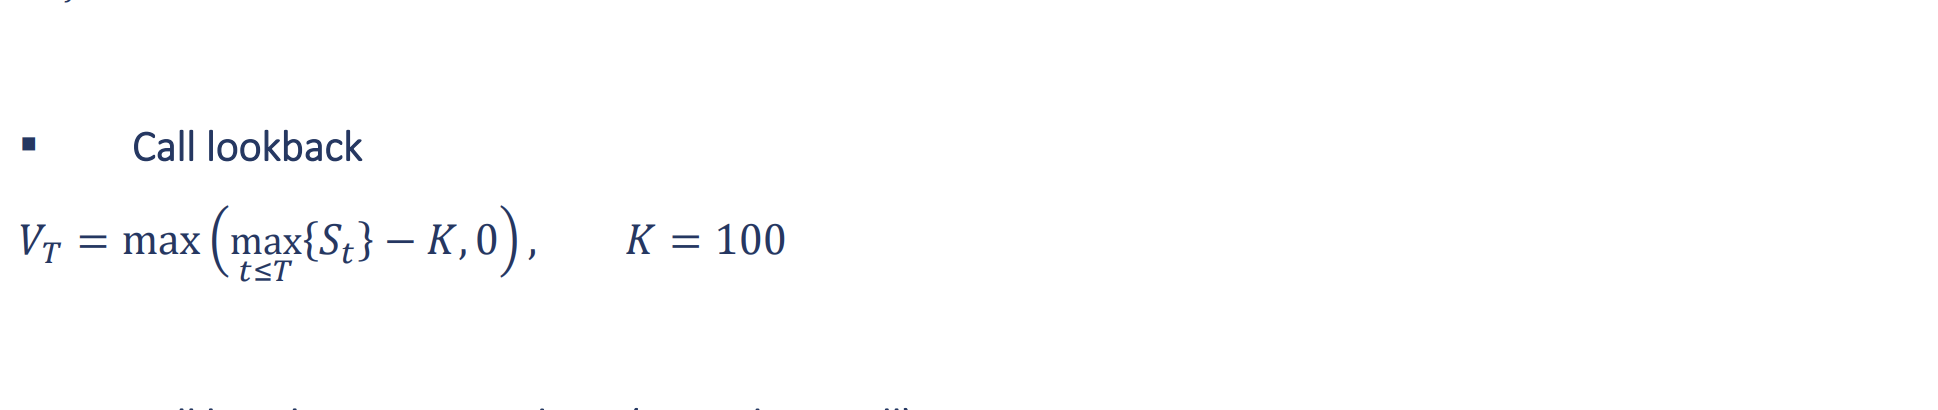

In [77]:
#strike price
K = 100

def payoff_lookback_call(st, k):
    # get the max of the price path
    max_price = max(st)
    # calculate payoff between the max of the path and strike
    payoff = max(max_price - k, 0)
    return payoff

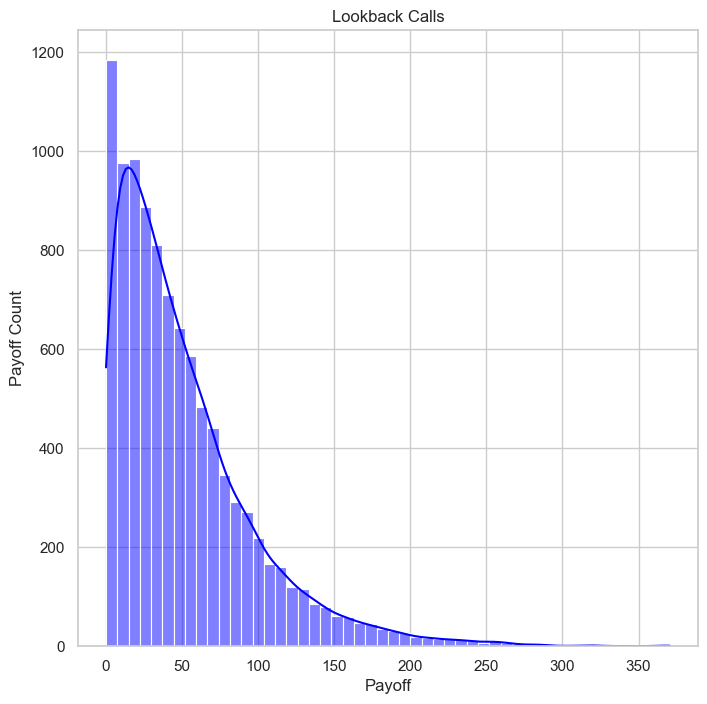

'Como o preço inicial é 100 e o strike é 100, max(St) >= 100, e o payoff será sempre >= 0'

In [78]:
# consider the whole price path
price_values = gbm_paths_df

# calculate payoffs
payoffs_lookback = price_values.apply(lambda x: payoff_lookback_call(x, K))
plot_histogram(payoffs_lookback, 'Lookback Calls')

'''Como o preço inicial é 100 e o strike é 100, max(St) >= 100, e o payoff será sempre >= 0'''


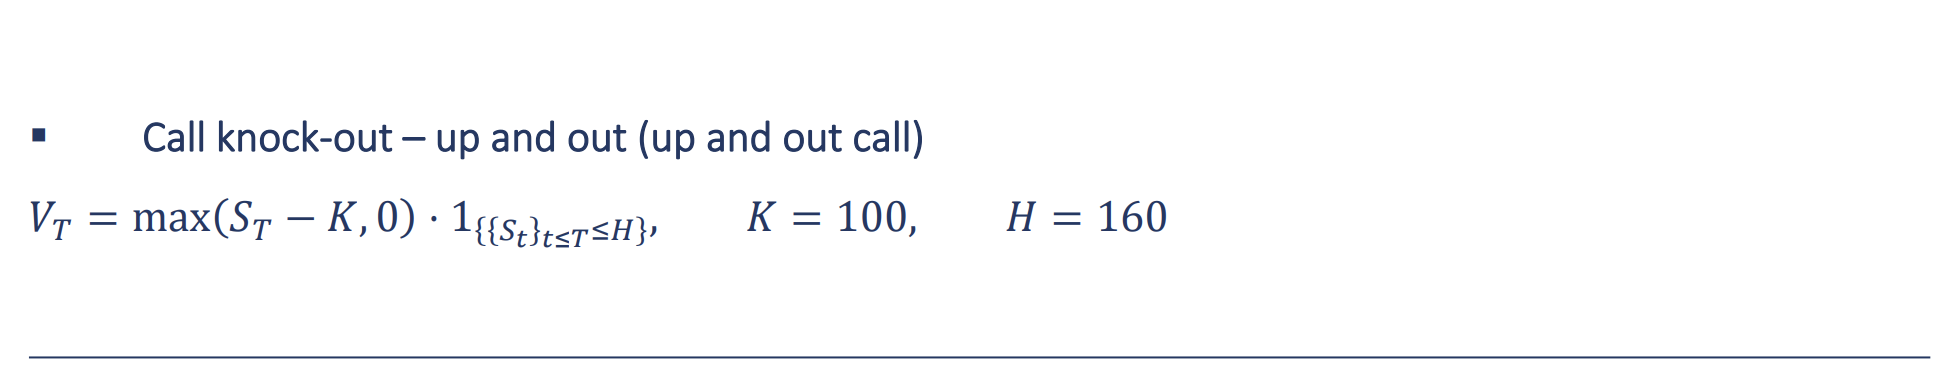

In [79]:
K = 100
barrier = 160

def payoff_call_up_and_out(st, k, barrier):
    # if at any point in the path we hit the upper barrier, 
    # the option payoff is 0
    if any(st > barrier):
        return 0

    # otherwise the payoff is like a vanilla call option
    # get last price of path
    final_value = st.iloc[-1]
    return max(final_value - k, 0)

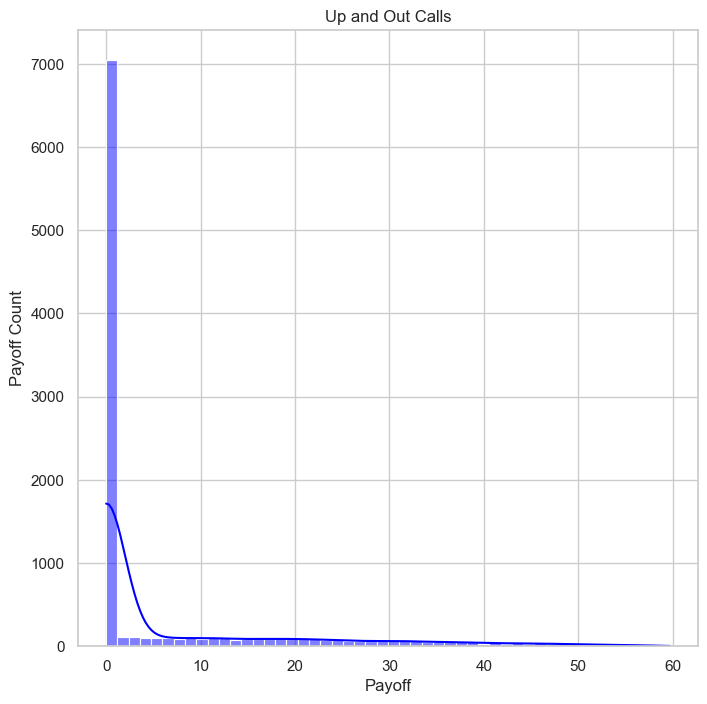

In [80]:
price_values = gbm_paths_df
payoffs_up_and_out = price_values.apply(lambda x: payoff_call_up_and_out(x, K, barrier))

plot_histogram(payoffs_up_and_out, 'Up and Out Calls')